# 01. Dataset preparation

Author: [ArtyomR](https://github.com/ArtyomR)  
Source: 

**In this Notebook I'll walk through raw data preperation for futher usage in machine learning tasks**  
Dataset was creted within [Chinese AI news agregation project](https://t.me/chinese_ai_news).   

Next steps were implemented.
1. Rename columns
2. Delete NaNs
3. Exploration Data Analysis (EDA)
4. Plot barcharts
5. Create additional features
6. Visualization Data with WordCloud

In [102]:
import pandas as pd
import matplotlib.pyplot as plt

In [141]:
data = pd.read_excel('ai_articles_231124.xlsx')

In [142]:
data

,publication,url,title,title_ru,paragraphOne,paragraphOne_ru,publish_date,top_image,msg_id,tags,publish_date_tg
0,Published,https://www.scmp.com/tech/article/3242683/brit...,British AI chip darling Graphcore pulls out of...,Британский разработчик чипов искусственного ин...,The British graphics processing unit maker Gra...,Британский производитель графических процессор...,2023-11-24 15:00:09,https://cdn.i-scmp.com/sites/default/files/sty...,1483.0,#Nvidia #чипы #спорт,2023-11-24 14:41:13
1,Published,https://www.scmp.com/week-asia/people/article/...,Asia-Pacific is new ‘ground zero’ for cybercri...,Азиатско-Тихоокеанский регион стал новым «эпиц...,The ‘attack rate’ in the Asia-Pacific is ‘well...,«Уровень атак» в Азиатско-Тихоокеанском регион...,2023-11-24 17:00:46,https://cdn.i-scmp.com/sites/default/files/sty...,1484.0,#криминал,2023-11-24 14:41:43
2,Published,https://global.chinadaily.com.cn/a/202311/24/W...,AI's ethical governance emphasized,Подчеркнуто этическое управление ИИ,Artificial intelligence presents not only enor...,Искусственный интеллект представляет не только...,2023-11-24 00:00:00,https://img2.chinadaily.com.cn/images/202311/2...,1485.0,#риск #мероприятия,2023-11-24 14:42:14
3,Not published,https://www.ithome.com/0/734/820.htm,西班牙一设计师打造当地首个 AI 模特，最高月入 1 万欧元,Испанский дизайнер создает первую местную моде...,IT之家 11 月 24 日消息，据外媒 euronews 当地时间周三报道，西班牙首个 A...,"24 ноября IT House сообщил, что зарубежные СМИ...",NaT,https://img.ithome.com/newsuploadfiles/2023/11...,NaN,NaN,NaN
4,Not published,https://www.ithome.com/0/734/870.htm,研究显示 ChatGPT 可为科学假说生成虚假数据集，对学术诚信造成威胁,"Исследование показывает, что ChatGPT может ген...",IT之家 11 月 24 日消息，据《自然》杂志当地时间周三报道，本月初发表在《美国医学会眼...,"IT House News от 24 ноября, согласно сообщению...",NaT,https://img.ithome.com/newsuploadfiles/2023/11...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3283,Published,https://www.ithome.com/0/691/971.htm,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
3284,Published,https://www.ithome.com/0/691/953.htm,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
3285,Published,https://www.ithome.com/0/691/882.htm,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
3286,Published,https://www.ithome.com/0/691/854.htm,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN


## Rename columns

In [143]:
data.columns

Index(['publication', 'url', 'title', 'title_ru', 'paragraphOne',
       'paragraphOne_ru', 'publish_date', 'top_image', 'msg_id', 'tags',
       'publish_date_tg'],
      dtype='object')

In [144]:
data.rename(columns={'paragraphOne':'paragraph_one','paragraphOne_ru':'paragraph_one_ru'}, inplace=True)

In [145]:
data.columns

Index(['publication', 'url', 'title', 'title_ru', 'paragraph_one',
       'paragraph_one_ru', 'publish_date', 'top_image', 'msg_id', 'tags',
       'publish_date_tg'],
      dtype='object')

In [146]:
data['publication'].value_counts()

publication
Not published    1739
Published        1391
Error              74
Unclear            33
Postponed           4
Name: count, dtype: int64

## Delete NaNs

In [147]:
data[data['title'].isna()]

,publication,url,title,title_ru,paragraph_one,paragraph_one_ru,publish_date,top_image,msg_id,tags,publish_date_tg
6,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
611,NaN,https://live.ithome.com/item/726374.htm,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
779,NaN,https://live.ithome.com/item/724170.htm,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
1432,NaN,https://live.ithome.com/item/714512.htm,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
1609,NaN,https://www.ithome.com/0/712/083.htm,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3283,Published,https://www.ithome.com/0/691/971.htm,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
3284,Published,https://www.ithome.com/0/691/953.htm,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
3285,Published,https://www.ithome.com/0/691/882.htm,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
3286,Published,https://www.ithome.com/0/691/854.htm,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN


In [148]:
data_nona = data[data['title'].notna()]

In [149]:
data_nona

,publication,url,title,title_ru,paragraph_one,paragraph_one_ru,publish_date,top_image,msg_id,tags,publish_date_tg
0,Published,https://www.scmp.com/tech/article/3242683/brit...,British AI chip darling Graphcore pulls out of...,Британский разработчик чипов искусственного ин...,The British graphics processing unit maker Gra...,Британский производитель графических процессор...,2023-11-24 15:00:09,https://cdn.i-scmp.com/sites/default/files/sty...,1483.0,#Nvidia #чипы #спорт,2023-11-24 14:41:13
1,Published,https://www.scmp.com/week-asia/people/article/...,Asia-Pacific is new ‘ground zero’ for cybercri...,Азиатско-Тихоокеанский регион стал новым «эпиц...,The ‘attack rate’ in the Asia-Pacific is ‘well...,«Уровень атак» в Азиатско-Тихоокеанском регион...,2023-11-24 17:00:46,https://cdn.i-scmp.com/sites/default/files/sty...,1484.0,#криминал,2023-11-24 14:41:43
2,Published,https://global.chinadaily.com.cn/a/202311/24/W...,AI's ethical governance emphasized,Подчеркнуто этическое управление ИИ,Artificial intelligence presents not only enor...,Искусственный интеллект представляет не только...,2023-11-24 00:00:00,https://img2.chinadaily.com.cn/images/202311/2...,1485.0,#риск #мероприятия,2023-11-24 14:42:14
3,Not published,https://www.ithome.com/0/734/820.htm,西班牙一设计师打造当地首个 AI 模特，最高月入 1 万欧元,Испанский дизайнер создает первую местную моде...,IT之家 11 月 24 日消息，据外媒 euronews 当地时间周三报道，西班牙首个 A...,"24 ноября IT House сообщил, что зарубежные СМИ...",NaT,https://img.ithome.com/newsuploadfiles/2023/11...,NaN,NaN,NaN
4,Not published,https://www.ithome.com/0/734/870.htm,研究显示 ChatGPT 可为科学假说生成虚假数据集，对学术诚信造成威胁,"Исследование показывает, что ChatGPT может ген...",IT之家 11 月 24 日消息，据《自然》杂志当地时间周三报道，本月初发表在《美国医学会眼...,"IT House News от 24 ноября, согласно сообщению...",NaT,https://img.ithome.com/newsuploadfiles/2023/11...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3129,Not published,https://www.scmp.com/tech/tech-trends/article/...,Grammarly taps the power of generative AI with...,Grammarly использует возможности генеративного...,Grammarly Business uses artificial intelligenc...,Grammarly Business использует искусственный ин...,NaT,NaN,NaN,NaN,NaN
3130,Not published,https://www.ithome.com/0/693/337.htm,每轮对话限制 5 次，不登录微软账号也能使用必应聊天,Существует ограничение в 5 разговоров за раунд...,IT之家 5 月 18 日消息，用户现在可以在不登录微软账号的情况下，使用必应聊天（Bing...,IT Home News 18 мая пользователи теперь могут ...,NaT,NaN,NaN,NaN,NaN
3131,Not published,https://www.ithome.com/0/693/343.htm,能以 PDF / Word 格式导出，微软必应聊天上线新特性,"Возможен экспорт в формат PDF/Word, онлайн-чат...",IT之家 5 月 18 日消息，根据微软必应工程和产品部负责人 Jordi Ribas 分享...,"Согласно новостям от IT House от 18 мая, согла...",NaT,NaN,NaN,NaN,NaN
3132,Not published,https://www.ithome.com/0/693/363.htm,报告称 81% 员工不认为其工作可以被 AI 取代,"81% сотрудников считают, что искусственный инт...",IT之家 5 月 18 日消息，人工智能在未来会导致你的工作退出历史舞台吗？在最新一项调查中...,"IT Home News от 18 мая, заставит ли искусствен...",NaT,NaN,NaN,NaN,NaN


In [150]:
data_nona[data_nona['top_image'].isna()]

,publication,url,title,title_ru,paragraph_one,paragraph_one_ru,publish_date,top_image,msg_id,tags,publish_date_tg
2315,Published,https://www.scmp.com/news/china/diplomacy/arti...,Eye on AI as US-China rivalry enters new front...,"Взгляд на ИИ, поскольку соперничество между СШ...",China votes ‘no’ as 132 Unesco states give the...,"Китай проголосовал «против», поскольку 132 гос...",NaT,NaN,527.0,#ГосПолитика,2023-07-02T10:25:48
2316,Not published,https://www.scmp.com/comment/opinion/article/3...,Landscape art vs leader portraits: how the US ...,Пейзаж против портретов вождей: чем отличаются...,"When China hosts foreign dignitaries, massive ...","Когда Китай принимает иностранных сановников, ...",NaT,NaN,NaN,NaN,NaN
2318,Published,https://www.scmp.com/comment/opinion/article/3...,Europe must choose: back US tech war on China ...,Европа должна выбрать: поддержать технологичес...,The national security focus of the debate abou...,Акцент на национальной безопасности в дебатах ...,NaT,NaN,504.0,#игры #Huawei #риск,2023-06-29T08:06:16
2319,Not published,https://global.chinadaily.com.cn/a/202306/29/W...,Nation to promote R&D on 6G tech,Страна будет продвигать исследования и разрабо...,China will vigorously promote the research and...,Китай будет активно продвигать исследования и ...,NaT,NaN,NaN,NaN,NaN
2320,Not published,https://global.chinadaily.com.cn/a/202306/29/W...,China Mobile establishes metaverse industry al...,China Mobile создает отраслевой альянс Metaverse,China Mobile has established an industry allia...,China Mobile создала отраслевой альянс для мет...,NaT,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3129,Not published,https://www.scmp.com/tech/tech-trends/article/...,Grammarly taps the power of generative AI with...,Grammarly использует возможности генеративного...,Grammarly Business uses artificial intelligenc...,Grammarly Business использует искусственный ин...,NaT,NaN,NaN,NaN,NaN
3130,Not published,https://www.ithome.com/0/693/337.htm,每轮对话限制 5 次，不登录微软账号也能使用必应聊天,Существует ограничение в 5 разговоров за раунд...,IT之家 5 月 18 日消息，用户现在可以在不登录微软账号的情况下，使用必应聊天（Bing...,IT Home News 18 мая пользователи теперь могут ...,NaT,NaN,NaN,NaN,NaN
3131,Not published,https://www.ithome.com/0/693/343.htm,能以 PDF / Word 格式导出，微软必应聊天上线新特性,"Возможен экспорт в формат PDF/Word, онлайн-чат...",IT之家 5 月 18 日消息，根据微软必应工程和产品部负责人 Jordi Ribas 分享...,"Согласно новостям от IT House от 18 мая, согла...",NaT,NaN,NaN,NaN,NaN
3132,Not published,https://www.ithome.com/0/693/363.htm,报告称 81% 员工不认为其工作可以被 AI 取代,"81% сотрудников считают, что искусственный инт...",IT之家 5 月 18 日消息，人工智能在未来会导致你的工作退出历史舞台吗？在最新一项调查中...,"IT Home News от 18 мая, заставит ли искусствен...",NaT,NaN,NaN,NaN,NaN


In [151]:
data_nona[data_nona['publication']=='Unclear']

,publication,url,title,title_ru,paragraph_one,paragraph_one_ru,publish_date,top_image,msg_id,tags,publish_date_tg


In [152]:
data[data['publication']=='Unclear']

,publication,url,title,title_ru,paragraph_one,paragraph_one_ru,publish_date,top_image,msg_id,tags,publish_date_tg
3168,Unclear,https://www.scmp.com/tech/big-tech/article/321...,NaN,NaN,NaN,NaN,NaT,NaN,103.0,#чипы #авто,2023-05-03T08:47:07
3169,Unclear,https://www.scmp.com/tech/tech-trends/article/...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
3170,Unclear,https://www.scmp.com/tech/article/3219280/gene...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
3171,Unclear,https://www.scmp.com/tech/tech-trends/article/...,NaN,NaN,NaN,NaN,NaT,NaN,107.0,NaN,2023-05-04T23:06:47
3172,Unclear,https://www.scmp.com/news/china/science/articl...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
3173,Unclear,https://www.scmp.com/news/world/united-states-...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
3174,Unclear,https://www.scmp.com/tech/tech-trends/article/...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
3175,Unclear,https://www.scmp.com/tech/tech-war/article/321...,NaN,NaN,NaN,NaN,NaT,NaN,117.0,NaN,2023-05-08T17:35:14
3176,Unclear,https://www.scmp.com/comment/letters/article/3...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
3177,Unclear,https://www.scmp.com/news/china/politics/artic...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN


In [153]:
data_nona.isna().sum()

publication           35
url                    0
title                  0
title_ru               0
paragraph_one         20
paragraph_one_ru      22
publish_date        2321
top_image            818
msg_id              1853
tags                2128
publish_date_tg     1853
dtype: int64

In [154]:
data_nona[data_nona['publication'].isna()]

,publication,url,title,title_ru,paragraph_one,paragraph_one_ru,publish_date,top_image,msg_id,tags,publish_date_tg
71,NaN,https://www.ithome.com/0/734/201.htm,Sonos 明年有望推出一体式机顶盒：整合音箱、定位“家庭影院系统”,"Ожидается, что в следующем году Sonos выпустит...",IT之家 11 月 22 日消息，音箱制造商 Sonos 的 CEO Patrick Spe...,"22 ноября IT House сообщил, что Патрик Спенс, ...",NaT,https://img.ithome.com/newsuploadfiles/2023/11...,NaN,NaN,NaN
72,NaN,https://ai.cnmo.com/news/763886.html,年薪百万招兵买马 拼多多已成立团队 杀入大模型领域,"Имея годовую зарплату в один миллион, Pinduodu...",【CNMO新闻】11月21日，CNMO注意到，根据“Tech星球”的消息，拼多多已经成立...,"[Новости CNMO] 21 ноября CNMO заметила, что, с...",NaT,https://img.cnmo.com/2178_600x1000/2177970.png,NaN,NaN,NaN
73,NaN,https://ai.cnmo.com/news/763896.html,英伟达CEO黄仁勋：行业正处于人工智能浪潮的开端,Генеральный директор Nvidia Дженсен Хуанг: отр...,【CNMO新闻】近日，英伟达（NVIDIA）首席执行官黄仁勋表示，全球正处于人工智能（A...,[CNMO News] Недавно генеральный директор NVIDI...,NaT,https://img.cnmo.com/2178_600x1000/2177994.jpg,NaN,NaN,NaN
168,NaN,https://www.ithome.com/0/733/079.htm,小米申请注册澎湃智联商标，国际分类包含科学仪器、设计研究等,Компания Xiaomi подала заявку на регистрацию т...,IT之家 11 月 16 日消息，在今日上午的 2023 小米 IoT 生态伙伴大会上，小米...,"16 ноября IT House сообщила, что сегодня утром...",NaT,https://img.ithome.com/newsuploadfiles/2023/11...,NaN,NaN,NaN
169,NaN,https://internet.cnmo.com/event/763560.html,金山办公WPS AI开启公测 面向全体用户陆续开放体验,Kingsoft Office WPS AI открывает публичную бет...,【CNMO新闻】11月16日，WPS官微正式宣布，金山办公旗下具备大语言模型能力的人工智...,[CNMO News] 16 ноября официальный представител...,NaT,https://img.cnmo.com/2177_600x1000/2176848.png,NaN,NaN,NaN
313,NaN,https://global.chinadaily.com.cn/a/202311/08/W...,10 Years: WIC Perspectives - Outlook of Optimi...,10 лет: перспективы WIC – оптимизм: искусствен...,"Fan Jianping, vice president of Lenovo Group a...","Фань Цзяньпин, вице-президент Lenovo Group и р...",2023-11-08 00:00:00,http://img2.chinadaily.com.cn/images/202311/08...,NaN,NaN,NaN
314,NaN,https://global.chinadaily.com.cn/a/202311/08/W...,360 buys Huawei's AI chips as alternative to N...,360 покупает AI-чипы Huawei в качестве альтерн...,Chinese cybersecurity company 360 Security Gro...,Китайская компания по кибербезопасности 360 Se...,2023-11-08 00:00:00,https://img2.chinadaily.com.cn/images/202311/0...,NaN,NaN,NaN
398,NaN,https://www.ithome.com/0/730/014.htm,马斯克：人类应高度关注类人机器人，给它们安装物理开关很有必要,Маск: Человечеству следует обратить пристально...,IT之家 11 月 4 日消息，在近期于英国布莱切利园举行的世界首届 AI 峰会期间，马斯克...,"4 ноября IT House сообщил, что во время первог...",NaT,https://img.ithome.com/newsuploadfiles/2023/11...,NaN,NaN,NaN
569,NaN,https://www.ithome.com/0/727/311.htm,长城汽车宣布与科大讯飞合作，推出“首个汽车产业知识大模型”,Great Wall Motors объявила о сотрудничестве с ...,IT之家 10 月 24 日消息，2023 科大讯飞全球 1024 开发者节在合肥开幕，IT...,"24 октября IT House сообщила, что в Хэфэе откр...",NaT,https://img.ithome.com/newsuploadfiles/2023/10...,NaN,NaN,NaN
570,NaN,https://www.ithome.com/0/727/376.htm,小度推出 Tiantian Casa ARIA 智能音箱：透明腔体 + Hi-Res 双金标...,Xiaodu выпускает интеллектуальную колонку Tian...,IT之家 10 月 25 日消息，小度 Tiantian Casa ARIA 智能音箱日前上...,"25 октября компания IT House сообщила, что инт...",NaT,https://img.ithome.com/newsuploadfiles/2023/10...,NaN,NaN,NaN


In [155]:
data_nona = data_nona[data['publication'].notna()]

C:\Users\MSI\AppData\Local\Temp\ipykernel_18700\84631030.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_nona = data_nona[data['publication'].notna()]


In [156]:
data_nona[data_nona['publication'].isna()]

,publication,url,title,title_ru,paragraph_one,paragraph_one_ru,publish_date,top_image,msg_id,tags,publish_date_tg


In [157]:
data_nona.isna().sum()

publication            0
url                    0
title                  0
title_ru               0
paragraph_one         20
paragraph_one_ru      22
publish_date        2290
top_image            818
msg_id              1818
tags                2093
publish_date_tg     1818
dtype: int64

In [158]:
data_nona['publication'].value_counts()

publication
Not published    1711
Published        1299
Error              74
Postponed           4
Name: count, dtype: int64

In [159]:
data_nona = data_nona[data_nona['publication']!='Postponed']

In [160]:
data_nona['publication'].value_counts()

publication
Not published    1711
Published        1299
Error              74
Name: count, dtype: int64

In [161]:
# Создаем столбец 'published_flag' и присваиваем ему значения на основе условий
data_nona['published_flag'] = data_nona['publication'].apply(lambda x: 0 if x == 'Not published' else 1)

# Печать результата, если нужно
print(data_nona['published_flag'].value_counts())

published_flag
0    1711
1    1373
Name: count, dtype: int64


In [162]:
res=data_nona['published_flag'].value_counts()

In [163]:
type(res)

pandas.core.series.Series

## Plot barchart

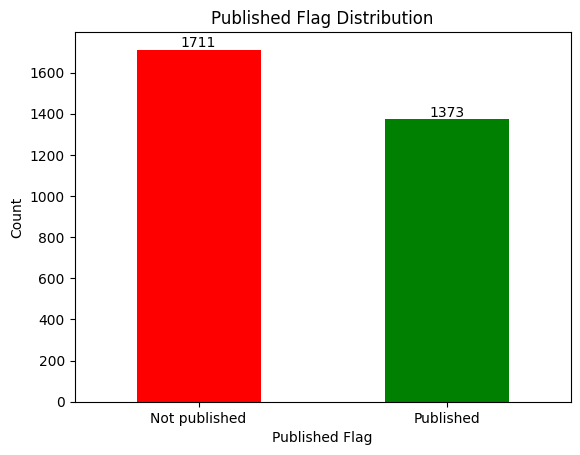

In [164]:
# Строим столбчатую диаграмму
res.plot(kind='bar', color=['red', 'green'])

# Добавляем заголовок и подписи осей
plt.title('Published Flag Distribution')
plt.xlabel('Published Flag')
plt.ylabel('Count')

# Получаем текущие оси
ax = plt.gca()

# Добавляем подписи значений на столбцах
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Разворачиваем подписи по оси X горизонтально
plt.xticks(ticks=[0, 1], labels=['Not published', 'Published'], rotation=0)

# Отображаем диаграмму
plt.show()

In [165]:
print(f'{res[0]/(res[0]+res[1])*100:.2f}% of records were Not published.')
print(f'{res[1]/(res[0]+res[1])*100:.2f}% of records were Published.')

55.48% of records were Not published.
44.52% of records were Published.


## Add language feature

In [166]:
# Функция для определения языка на основе подстроки в URL
def determine_language(url):
    if 'pandaily' in url:
        return 'en'
    elif 'technode' in url:
        return 'en'
    elif 'cnmo' in url:
        return 'cn'
    elif 'ithome' in url:
        return 'cn'
    elif 'chinadaily' in url:
        return 'en'
    elif 'scmp' in url:
        return 'en'
    elif 'technologynewschina' in url:
        return 'en'
    else:
        return None  
        
# Добавляем столбец 'language' в DataFrame
data_nona['language'] = data_nona['url'].apply(determine_language)

data_nona

,publication,url,title,title_ru,paragraph_one,paragraph_one_ru,publish_date,top_image,msg_id,tags,publish_date_tg,published_flag,language
0,Published,https://www.scmp.com/tech/article/3242683/brit...,British AI chip darling Graphcore pulls out of...,Британский разработчик чипов искусственного ин...,The British graphics processing unit maker Gra...,Британский производитель графических процессор...,2023-11-24 15:00:09,https://cdn.i-scmp.com/sites/default/files/sty...,1483.0,#Nvidia #чипы #спорт,2023-11-24 14:41:13,1,en
1,Published,https://www.scmp.com/week-asia/people/article/...,Asia-Pacific is new ‘ground zero’ for cybercri...,Азиатско-Тихоокеанский регион стал новым «эпиц...,The ‘attack rate’ in the Asia-Pacific is ‘well...,«Уровень атак» в Азиатско-Тихоокеанском регион...,2023-11-24 17:00:46,https://cdn.i-scmp.com/sites/default/files/sty...,1484.0,#криминал,2023-11-24 14:41:43,1,en
2,Published,https://global.chinadaily.com.cn/a/202311/24/W...,AI's ethical governance emphasized,Подчеркнуто этическое управление ИИ,Artificial intelligence presents not only enor...,Искусственный интеллект представляет не только...,2023-11-24 00:00:00,https://img2.chinadaily.com.cn/images/202311/2...,1485.0,#риск #мероприятия,2023-11-24 14:42:14,1,en
3,Not published,https://www.ithome.com/0/734/820.htm,西班牙一设计师打造当地首个 AI 模特，最高月入 1 万欧元,Испанский дизайнер создает первую местную моде...,IT之家 11 月 24 日消息，据外媒 euronews 当地时间周三报道，西班牙首个 A...,"24 ноября IT House сообщил, что зарубежные СМИ...",NaT,https://img.ithome.com/newsuploadfiles/2023/11...,NaN,NaN,NaN,0,cn
4,Not published,https://www.ithome.com/0/734/870.htm,研究显示 ChatGPT 可为科学假说生成虚假数据集，对学术诚信造成威胁,"Исследование показывает, что ChatGPT может ген...",IT之家 11 月 24 日消息，据《自然》杂志当地时间周三报道，本月初发表在《美国医学会眼...,"IT House News от 24 ноября, согласно сообщению...",NaT,https://img.ithome.com/newsuploadfiles/2023/11...,NaN,NaN,NaN,0,cn
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3129,Not published,https://www.scmp.com/tech/tech-trends/article/...,Grammarly taps the power of generative AI with...,Grammarly использует возможности генеративного...,Grammarly Business uses artificial intelligenc...,Grammarly Business использует искусственный ин...,NaT,NaN,NaN,NaN,NaN,0,en
3130,Not published,https://www.ithome.com/0/693/337.htm,每轮对话限制 5 次，不登录微软账号也能使用必应聊天,Существует ограничение в 5 разговоров за раунд...,IT之家 5 月 18 日消息，用户现在可以在不登录微软账号的情况下，使用必应聊天（Bing...,IT Home News 18 мая пользователи теперь могут ...,NaT,NaN,NaN,NaN,NaN,0,cn
3131,Not published,https://www.ithome.com/0/693/343.htm,能以 PDF / Word 格式导出，微软必应聊天上线新特性,"Возможен экспорт в формат PDF/Word, онлайн-чат...",IT之家 5 月 18 日消息，根据微软必应工程和产品部负责人 Jordi Ribas 分享...,"Согласно новостям от IT House от 18 мая, согла...",NaT,NaN,NaN,NaN,NaN,0,cn
3132,Not published,https://www.ithome.com/0/693/363.htm,报告称 81% 员工不认为其工作可以被 AI 取代,"81% сотрудников считают, что искусственный инт...",IT之家 5 月 18 日消息，人工智能在未来会导致你的工作退出历史舞台吗？在最新一项调查中...,"IT Home News от 18 мая, заставит ли искусствен...",NaT,NaN,NaN,NaN,NaN,0,cn


In [167]:
data_nona[~data_nona['language'].isin(['en', 'cn'])]

,publication,url,title,title_ru,paragraph_one,paragraph_one_ru,publish_date,top_image,msg_id,tags,publish_date_tg,published_flag,language


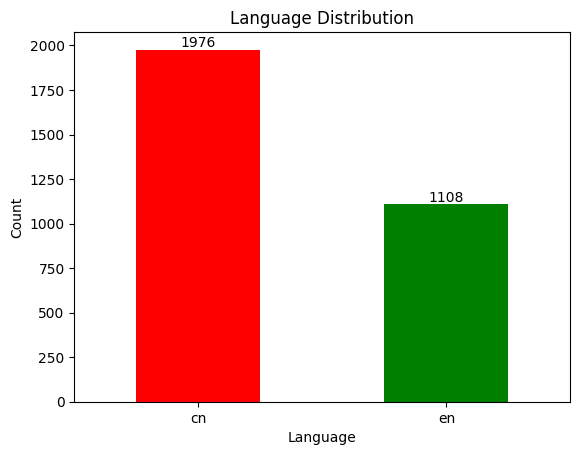

In [168]:
lang_dist = data_nona['language'].value_counts()

lang_dist.plot(kind='bar', color=['red', 'green'])

# Добавляем заголовок и подписи осей
plt.title('Language Distribution')
plt.xlabel('Language')
plt.ylabel('Count')

# Получаем текущие оси
ax = plt.gca()

# Добавляем подписи значений на столбцах
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Разворачиваем подписи по оси X горизонтально
plt.xticks(rotation=0)

# Отображаем диаграмму
plt.show()

In [169]:
print(f'{lang_dist[0]/(lang_dist[0]+lang_dist[1])*100:.2f}% of records are in Chinese.')
print(f'{lang_dist[1]/(lang_dist[0]+lang_dist[1])*100:.2f}% of records are in English.')

64.07% of records are in Chinese.
35.93% of records are in English.


C:\Users\MSI\AppData\Local\Temp\ipykernel_18700\3849772739.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'{lang_dist[0]/(lang_dist[0]+lang_dist[1])*100:.2f}% of records are in Chinese.')
C:\Users\MSI\AppData\Local\Temp\ipykernel_18700\3849772739.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'{lang_dist[1]/(lang_dist[0]+lang_dist[1])*100:.2f}% of records are in English.')


## Кросстаблица языки и флаги публикации

In [170]:
cross_table = pd.crosstab(index=data_nona['language'], columns=data_nona['published_flag'], normalize='index') * 100

print(cross_table)

published_flag          0          1
language                            
cn              65.131579  34.868421
en              38.267148  61.732852


## Объединяем текст заголовка и абзаца

In [171]:
data_nona.columns

Index(['publication', 'url', 'title', 'title_ru', 'paragraph_one',
       'paragraph_one_ru', 'publish_date', 'top_image', 'msg_id', 'tags',
       'publish_date_tg', 'published_flag', 'language'],
      dtype='object')

In [172]:
data_nona['combined_text_ru'] = data_nona['title_ru'] + ' ' + data_nona['paragraph_one_ru']
data_nona.head()

,publication,url,title,title_ru,paragraph_one,paragraph_one_ru,publish_date,top_image,msg_id,tags,publish_date_tg,published_flag,language,combined_text_ru
0,Published,https://www.scmp.com/tech/article/3242683/brit...,British AI chip darling Graphcore pulls out of...,Британский разработчик чипов искусственного ин...,The British graphics processing unit maker Gra...,Британский производитель графических процессор...,2023-11-24 15:00:09,https://cdn.i-scmp.com/sites/default/files/sty...,1483.0,#Nvidia #чипы #спорт,2023-11-24 14:41:13,1,en,Британский разработчик чипов искусственного ин...
1,Published,https://www.scmp.com/week-asia/people/article/...,Asia-Pacific is new ‘ground zero’ for cybercri...,Азиатско-Тихоокеанский регион стал новым «эпиц...,The ‘attack rate’ in the Asia-Pacific is ‘well...,«Уровень атак» в Азиатско-Тихоокеанском регион...,2023-11-24 17:00:46,https://cdn.i-scmp.com/sites/default/files/sty...,1484.0,#криминал,2023-11-24 14:41:43,1,en,Азиатско-Тихоокеанский регион стал новым «эпиц...
2,Published,https://global.chinadaily.com.cn/a/202311/24/W...,AI's ethical governance emphasized,Подчеркнуто этическое управление ИИ,Artificial intelligence presents not only enor...,Искусственный интеллект представляет не только...,2023-11-24 00:00:00,https://img2.chinadaily.com.cn/images/202311/2...,1485.0,#риск #мероприятия,2023-11-24 14:42:14,1,en,Подчеркнуто этическое управление ИИ Искусствен...
3,Not published,https://www.ithome.com/0/734/820.htm,西班牙一设计师打造当地首个 AI 模特，最高月入 1 万欧元,Испанский дизайнер создает первую местную моде...,IT之家 11 月 24 日消息，据外媒 euronews 当地时间周三报道，西班牙首个 A...,"24 ноября IT House сообщил, что зарубежные СМИ...",NaT,https://img.ithome.com/newsuploadfiles/2023/11...,NaN,NaN,NaN,0,cn,Испанский дизайнер создает первую местную моде...
4,Not published,https://www.ithome.com/0/734/870.htm,研究显示 ChatGPT 可为科学假说生成虚假数据集，对学术诚信造成威胁,"Исследование показывает, что ChatGPT может ген...",IT之家 11 月 24 日消息，据《自然》杂志当地时间周三报道，本月初发表在《美国医学会眼...,"IT House News от 24 ноября, согласно сообщению...",NaT,https://img.ithome.com/newsuploadfiles/2023/11...,NaN,NaN,NaN,0,cn,"Исследование показывает, что ChatGPT может ген..."


In [173]:
data_nona.isna().sum()

publication            0
url                    0
title                  0
title_ru               0
paragraph_one         16
paragraph_one_ru      18
publish_date        2286
top_image            816
msg_id              1814
tags                2089
publish_date_tg     1814
published_flag         0
language               0
combined_text_ru      18
dtype: int64

**combined_text_ru      18 NaN** - we will fix it

In [174]:
data_nona[data_nona['combined_text_ru'].isna()].head()

,publication,url,title,title_ru,paragraph_one,paragraph_one_ru,publish_date,top_image,msg_id,tags,publish_date_tg,published_flag,language,combined_text_ru
341,Not published,https://internet.cnmo.com/event/763010.html,OpenAI推出GPT-4 Turbo：功能更强大且更便宜,OpenAI запускает GPT-4 Turbo: мощнее и дешевле,NaN,NaN,NaT,https://icon.cnmo.com/articlepc/cimg_load.png,NaN,NaN,NaN,0,cn,NaN
581,Published,https://global.chinadaily.com.cn/a/202310/23/W...,Images: 2023 World Internet of Things Exposition,Изображения: Всемирная выставка Интернета веще...,NaN,NaN,2023-10-23,http://img2.chinadaily.com.cn/images/202310/23...,1265.0,NaN,2023-10-23 07:05:27,1,en,NaN
828,Published,https://www.scmp.com/video/technology/3237033/...,How does China’s AI stack up against ChatGPT?,Как китайский ИИ соотносится с ChatGPT?,NaN,NaN,NaT,https://cdn.i-scmp.com/sites/default/files/sty...,1159.0,#ChatGPT,2023-10-08 12:35:18,1,en,NaN
1186,Not published,https://global.chinadaily.com.cn/a/202309/08/W...,Advanced technology shines at the World Confer...,Передовые технологии блистают на Всемирной кон...,NaN,NaN,2023-09-08,http://img2.chinadaily.com.cn/images/202309/08...,NaN,NaN,NaN,0,en,NaN
1212,Published,https://www.scmp.com/video/asia/3233669/korean...,Korean researchers unveil world’s first humano...,Корейские исследователи представили первого в ...,NaN,NaN,NaT,https://cdn.i-scmp.com/sites/default/files/sty...,1013.0,#робот,2023-09-07 05:46:55,1,en,NaN


In [175]:
data_nona.loc[1212]

publication                                                 Published
url                 https://www.scmp.com/video/asia/3233669/korean...
title               Korean researchers unveil world’s first humano...
title_ru            Корейские исследователи представили первого в ...
paragraph_one                                                     NaN
paragraph_one_ru                                                  NaN
publish_date                                                      NaT
top_image           https://cdn.i-scmp.com/sites/default/files/sty...
msg_id                                                         1013.0
tags                                                           #робот
publish_date_tg                                   2023-09-07 05:46:55
published_flag                                                      1
language                                                           en
combined_text_ru                                                  NaN
Name: 1212, dtype: o

In [176]:
# Замена NaN на пустую строку в столбце paragraphOne_ru
data_nona['paragraph_one_ru'].fillna('', inplace=True)

# Создание нового столбца с объединенными значениями
data_nona['combined_text_ru'] = data_nona['title_ru'] + ' ' + data_nona['paragraph_one_ru']

data_nona.loc[1212]

publication                                                 Published
url                 https://www.scmp.com/video/asia/3233669/korean...
title               Korean researchers unveil world’s first humano...
title_ru            Корейские исследователи представили первого в ...
paragraph_one                                                     NaN
paragraph_one_ru                                                     
publish_date                                                      NaT
top_image           https://cdn.i-scmp.com/sites/default/files/sty...
msg_id                                                         1013.0
tags                                                           #робот
publish_date_tg                                   2023-09-07 05:46:55
published_flag                                                      1
language                                                           en
combined_text_ru    Корейские исследователи представили первого в ...
Name: 1212, dtype: o

## Visualization Data with WordCloud

In [183]:
#!pip install wordcloud

In [ ]:
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

Published news WordCloud


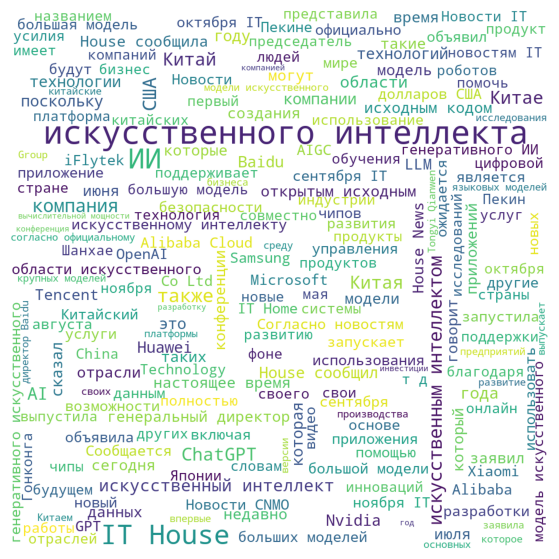

Unpublished news WordCloud


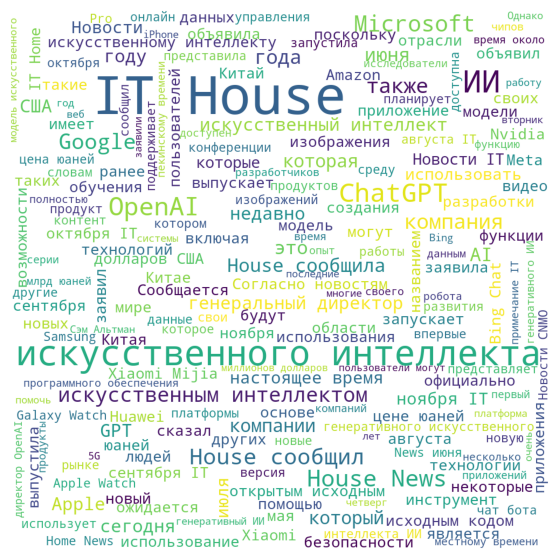

In [195]:
stop = set(stopwords.words('russian'))

Published = data_nona[data_nona['published_flag']==1]
Published = Published['combined_text_ru']
Unpublished = data_nona[data_nona['published_flag']==0]
Unpublished = Unpublished['combined_text_ru']

def wordcloud_draw(dataset, color = 'white'):

    words = ' '.join(dataset)

    cleaned_word = ' '.join([word for word in words.split()

    if (word != 'news' and word != 'text')])

    wordcloud = WordCloud(stopwords = stop,

    background_color = color,

    width = 1000, height = 1000).generate(cleaned_word)

    plt.figure(1, figsize = (10,7))

    plt.imshow(wordcloud)

    plt.axis("off")

    plt.show()

BOLD = '\033[1m'
UNDERLINE = '\033[4m'

print(BOLD+UNDERLINE+"Published news WordCloud")
wordcloud_draw(Published, 'white')
print(BOLD+UNDERLINE+"Unpublished news WordCloud")
wordcloud_draw(Unpublished, 'white')

## Экспорт файла

In [177]:
data_nona.to_excel('ai_articles_prep_231124.xlsx')

# Обновим Python

In [23]:
!pip install --upgrade python

Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement python (from versions: none)
ERROR: No matching distribution found for python


In [22]:
import sys
print(sys.version)

3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]
